In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00


In [2]:
import pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
df.replace('?',np.nan)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df['age'] = pd.cut(df['age'],bins=3,labels=['Young','Adult','Old'])
df['chol']=pd.cut(df['chol'], bins=3, labels=['Low','Normal','High'])

In [11]:
model=BayesianNetwork([('age','target'),
                       ('chol','target'),
                       ('cp','target'),
                       ('target','thalach')])

In [15]:
model.fit( df, estimator=MaximumLikelihoodEstimator)

In [16]:
infer=VariableElimination(model)

In [19]:
res1=infer.query(variables=['target'], evidence={'age':'Old','chol':'High','cp':1})

In [21]:
print(res1)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5000 |
+-----------+---------------+
| target(1) |        0.5000 |
+-----------+---------------+


In [22]:
res2=infer.query(variables=['target'], evidence={'age':'Old','chol':'High'})

In [23]:
print(res2)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3615 |
+-----------+---------------+
| target(1) |        0.6385 |
+-----------+---------------+


In [24]:
#---------------------------------------------------------------------

In [25]:
!pip install nltk
!pip install wordnet

  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10498 sha256=5e9a9862aba62e5e919055d0b285cd65ae5bf9b361477a6b58cc992ac5a82a6f
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet


In [26]:
import nltk

In [43]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [44]:
def create_text(fname,cont):
  with open(fname,'w') as file:
    file.write(cont)

In [45]:
def tokenize(text):
  return nltk.word_tokenize(text)

In [46]:
def remove_stop_words(text):
  stop_w=set(stopwords.words('english'))
  return [word for word in text if word not in stop_w and word not in string.punctuation]

In [47]:
def stemm(token):
  p=PorterStemmer()
  return [p.stem(tok) for tok in token]

In [48]:
def lemma(token):
  w=WordNetLemmatizer()
  return [w.lemmatize(tok) for tok in token]

In [49]:
def pos_tag(text):
  return nltk.pos_tag(text)

In [52]:
def ner(text):
  pos_tagged=pos_tag(text)
  return nltk.ne_chunk(pos_tagged)

In [56]:
if __name__ =="__main__":
  content="Hi my name is siddhi im good girl, bye. im studying"
  create_text("sample.txt",content)

  with open("sample.txt","r") as f:
    line=f.read()

  t=tokenize(line)
  print(f"Tokenized : {t}")
  t=remove_stop_words(t)
  print(f" stop words removed: {t}")
  t=stemm(t)
  print(f"stem : {t}")
  t=lemma(t)
  ti=t
  print(f"lemmatize : {t}")
  t=pos_tag(t)
  print(f"POS Tag : {t}")
  ti=ner(ti)
  print(f" NER : {ti}")

Tokenized : ['Hi', 'my', 'name', 'is', 'siddhi', 'im', 'good', 'girl', ',', 'bye', '.', 'im', 'studying']
 stop words removed: ['Hi', 'name', 'siddhi', 'im', 'good', 'girl', 'bye', 'im', 'studying']
stem : ['hi', 'name', 'siddhi', 'im', 'good', 'girl', 'bye', 'im', 'studi']
lemmatize : ['hi', 'name', 'siddhi', 'im', 'good', 'girl', 'bye', 'im', 'studi']
POS Tag : [('hi', 'NN'), ('name', 'NN'), ('siddhi', 'JJ'), ('im', 'RB'), ('good', 'JJ'), ('girl', 'NN'), ('bye', 'NN'), ('im', 'NN'), ('studi', 'NN')]
 NER : (S
  hi/NN
  name/NN
  siddhi/JJ
  im/RB
  good/JJ
  girl/NN
  bye/NN
  im/NN
  studi/NN)


In [57]:
#------------------------------------------------

In [140]:
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
import string

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [157]:
def create_file(filename,content):
  with open(filename,'w') as file:
    file.write(content)

def tokenize(text):
  return nltk.word_tokenize(text)

def removestopwords(tokens):
  stop_words=set(stopwords.words('english'))
  return [word for word in tokens if word not in stop_words and word not in string.punctuation]

def stemming(tokens):
  stemmer=PorterStemmer()
  return [stemmer.stem(tok) for tok in tokens]

def lemmatizing(tokens):
  lemma=WordNetLemmatizer()
  return [lemma.lemmatize(token) for token in tokens]

def pos_tagg(token):
  return nltk.pos_tag(token)

def ner(token):
  tagg=pos_tagg(token)
  return nltk.ne_chunk(tagg)

In [158]:
content="Diagnosis Prediction: The Bayesian Network model is designed to help in diagnosing heart disease by estimating the probability of having heart disease based on known patient information. In this case, the network is queried to get the likelihood of heart disease"

In [159]:
create_file("sample.txt",content)

In [160]:
with open("sample.txt",'r') as file:
  text=file.read()

In [161]:
tokens=tokenize(text)

In [162]:
tokens

['Diagnosis',
 'Prediction',
 ':',
 'The',
 'Bayesian',
 'Network',
 'model',
 'is',
 'designed',
 'to',
 'help',
 'in',
 'diagnosing',
 'heart',
 'disease',
 'by',
 'estimating',
 'the',
 'probability',
 'of',
 'having',
 'heart',
 'disease',
 'based',
 'on',
 'known',
 'patient',
 'information',
 '.',
 'In',
 'this',
 'case',
 ',',
 'the',
 'network',
 'is',
 'queried',
 'to',
 'get',
 'the',
 'likelihood',
 'of',
 'heart',
 'disease']

In [163]:
filtered_tokens=removestopwords(tokens)

In [164]:
print(filtered_tokens)

['Diagnosis', 'Prediction', 'The', 'Bayesian', 'Network', 'model', 'designed', 'help', 'diagnosing', 'heart', 'disease', 'estimating', 'probability', 'heart', 'disease', 'based', 'known', 'patient', 'information', 'In', 'case', 'network', 'queried', 'get', 'likelihood', 'heart', 'disease']


In [165]:
stemmed=stemming(filtered_tokens)

In [166]:
print(stemmed)

['diagnosi', 'predict', 'the', 'bayesian', 'network', 'model', 'design', 'help', 'diagnos', 'heart', 'diseas', 'estim', 'probabl', 'heart', 'diseas', 'base', 'known', 'patient', 'inform', 'in', 'case', 'network', 'queri', 'get', 'likelihood', 'heart', 'diseas']


In [167]:
lemmatized=lemmatizing(filtered_tokens)

In [168]:
print(lemmatized)

['Diagnosis', 'Prediction', 'The', 'Bayesian', 'Network', 'model', 'designed', 'help', 'diagnosing', 'heart', 'disease', 'estimating', 'probability', 'heart', 'disease', 'based', 'known', 'patient', 'information', 'In', 'case', 'network', 'queried', 'get', 'likelihood', 'heart', 'disease']


In [169]:
tagged=pos_tagg(stemmed)

In [170]:
print(tagged)

[('diagnosi', 'NNS'), ('predict', 'VBP'), ('the', 'DT'), ('bayesian', 'JJ'), ('network', 'NN'), ('model', 'NN'), ('design', 'NN'), ('help', 'NN'), ('diagnos', 'VB'), ('heart', 'NN'), ('diseas', 'NNS'), ('estim', 'VBP'), ('probabl', 'JJ'), ('heart', 'NN'), ('diseas', 'JJ'), ('base', 'NN'), ('known', 'VBN'), ('patient', 'JJ'), ('inform', 'NN'), ('in', 'IN'), ('case', 'NN'), ('network', 'NN'), ('queri', 'NN'), ('get', 'VB'), ('likelihood', 'JJ'), ('heart', 'NN'), ('diseas', 'NNS')]


In [171]:
nerred=ner(stemmed)

In [172]:
print(nerred)

(S
  diagnosi/NNS
  predict/VBP
  the/DT
  bayesian/JJ
  network/NN
  model/NN
  design/NN
  help/NN
  diagnos/VB
  heart/NN
  diseas/NNS
  estim/VBP
  probabl/JJ
  heart/NN
  diseas/JJ
  base/NN
  known/VBN
  patient/JJ
  inform/NN
  in/IN
  case/NN
  network/NN
  queri/NN
  get/VB
  likelihood/JJ
  heart/NN
  diseas/NNS)


In [173]:
#-------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [4]:
df=pd.read_csv('/content/CC GENERAL.csv')

In [5]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6626,C16809,1670.918981,1.000000,1543.83,1406.33,137.50,899.326582,1.000000,1.000000,0.250000,0.083333,2,32,7000.0,757.409319,370.391890,0.000000,12
2371,C12444,6.121105,0.571429,233.90,233.90,0.00,0.000000,0.428571,0.428571,0.000000,0.000000,0,5,10500.0,33.010201,53.943800,0.000000,7
8093,C18312,5.020473,0.181818,100.05,0.00,100.05,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,4000.0,360.227309,125.327855,0.333333,12
2427,C12501,3904.008546,1.000000,600.00,0.00,600.00,1433.189324,0.500000,0.000000,0.416667,0.500000,6,6,4700.0,1154.910275,1475.694904,0.000000,12
954,C10988,3908.104980,1.000000,1238.12,1159.30,78.82,1799.316522,0.666667,0.583333,0.166667,0.250000,4,13,6000.0,1147.443975,870.610813,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [18]:
df.drop('CUST_ID',axis=1,inplace=True)

In [19]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [20]:
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df)

In [21]:
df_norm=normalize(df_scaled)

In [23]:
df_norm=pd.DataFrame(df_norm)

In [30]:
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311806,-0.154954,-0.179717,-0.150396,-0.148581,-0.196246,-0.343691,-0.287374,-0.300313,-0.285562,-0.200761,-0.216751,-0.403071,-0.227772,-0.127929,-0.225169,0.148729
1,0.215652,0.019100,-0.133545,-0.101359,-0.129489,0.724875,-0.348852,-0.193676,-0.261474,0.157198,0.028012,-0.168495,0.191114,0.224880,0.024747,0.059936,0.100236
2,0.121694,0.144174,-0.033208,0.028501,-0.130890,-0.133690,0.358313,0.754993,-0.264303,-0.194536,-0.136766,-0.034365,0.232162,-0.113964,-0.028500,-0.153394,0.101320
3,-0.156537,0.211587,-0.195017,-0.146385,-0.192092,-0.196202,-0.430561,-0.171033,-0.387886,-0.285498,-0.200715,-0.233329,-0.380097,-0.159155,-0.109322,-0.225118,0.148696
4,0.045686,0.231939,0.065195,-0.164825,0.456538,-0.215074,0.195195,-0.314946,0.247302,-0.312960,-0.220022,-0.128189,-0.341406,-0.060632,0.298463,-0.246772,0.162999


In [50]:
pca=PCA(n_components=2)

In [51]:
df_pca=pca.fit_transform(df_norm)

In [53]:
df_pca=pd.DataFrame(df_pca, columns=['P1','P2'])

In [54]:
df_pca.head()

,P1,P2
0,-0.481788,-0.692991
1,-0.537375,0.527807
2,0.320760,0.265225
3,-0.562994,-0.503868
4,0.320512,-0.254469


In [55]:
print("Exp variance ratio: ")

Exp variance ratio: 


In [56]:
print(pca.explained_variance_ratio_)

[0.29255562 0.18306542]


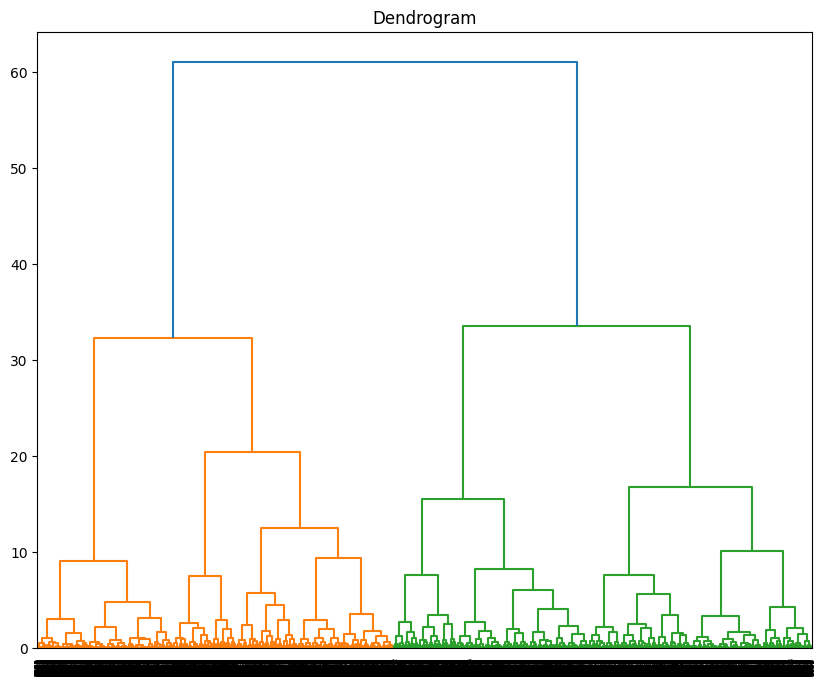

In [58]:
plt.figure(figsize=(10,8))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(df_pca.values,method='ward'))
plt.show()

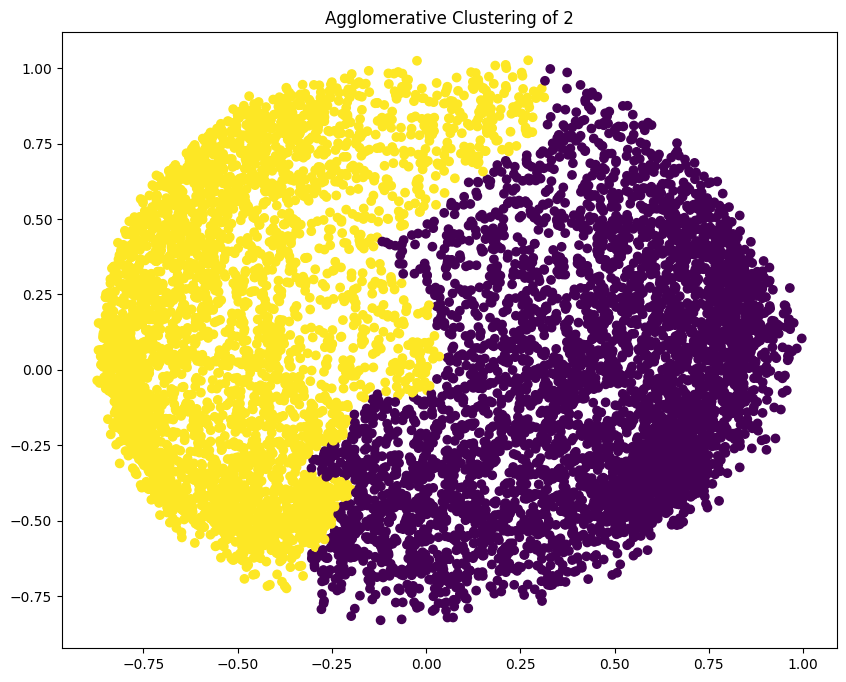

Solhouette score for 2 : 0.42321401633142125


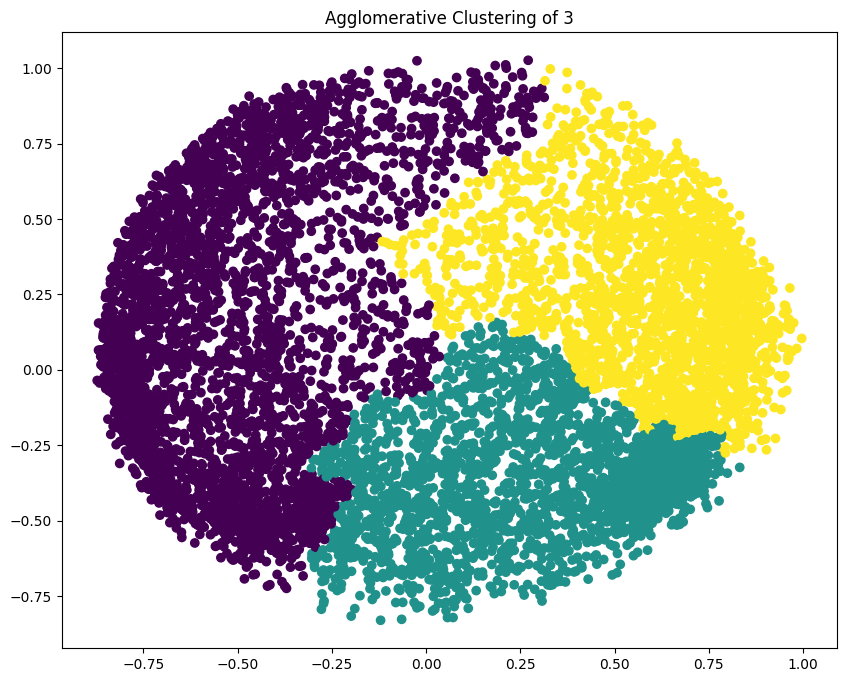

Solhouette score for 3 : 0.36481931015401675


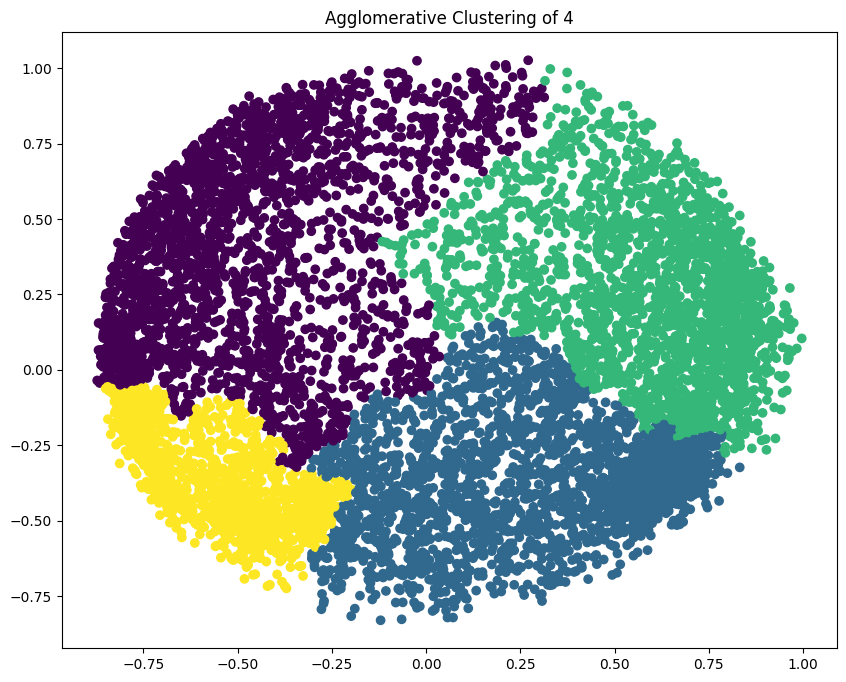

Solhouette score for 4 : 0.3557688175069914


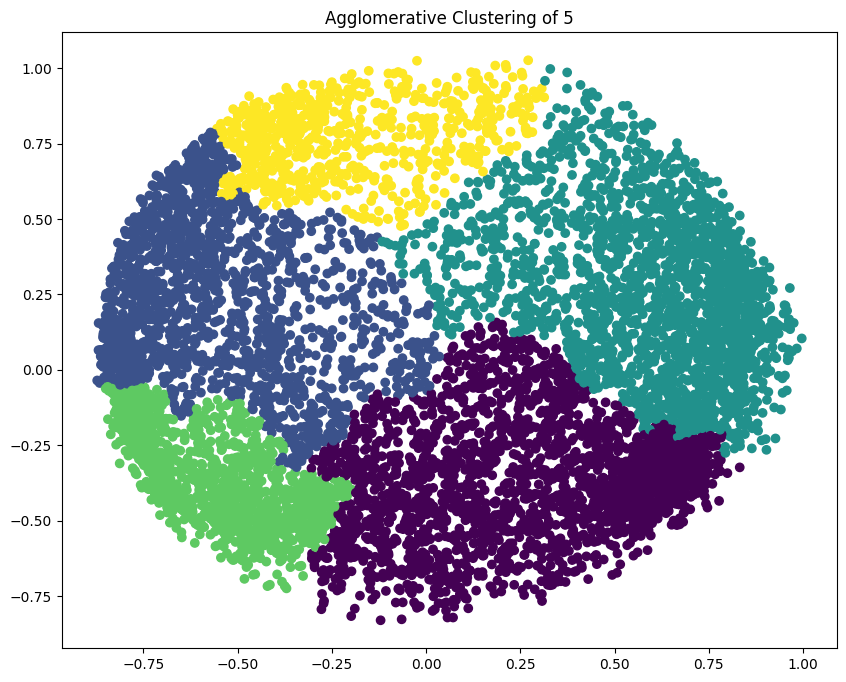

Solhouette score for 5 : 0.3450421622328166


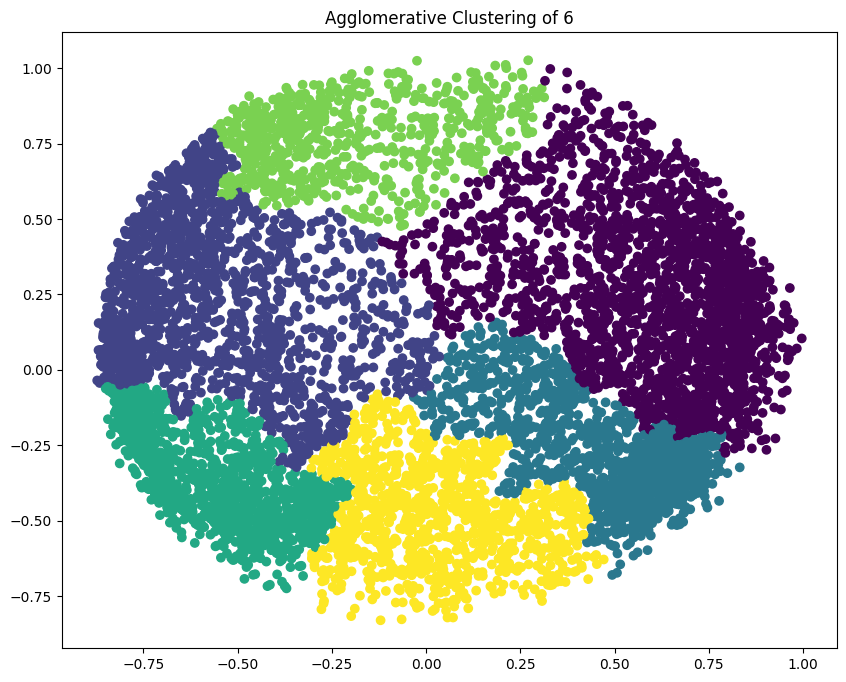

Solhouette score for 6 : 0.31328368900006576


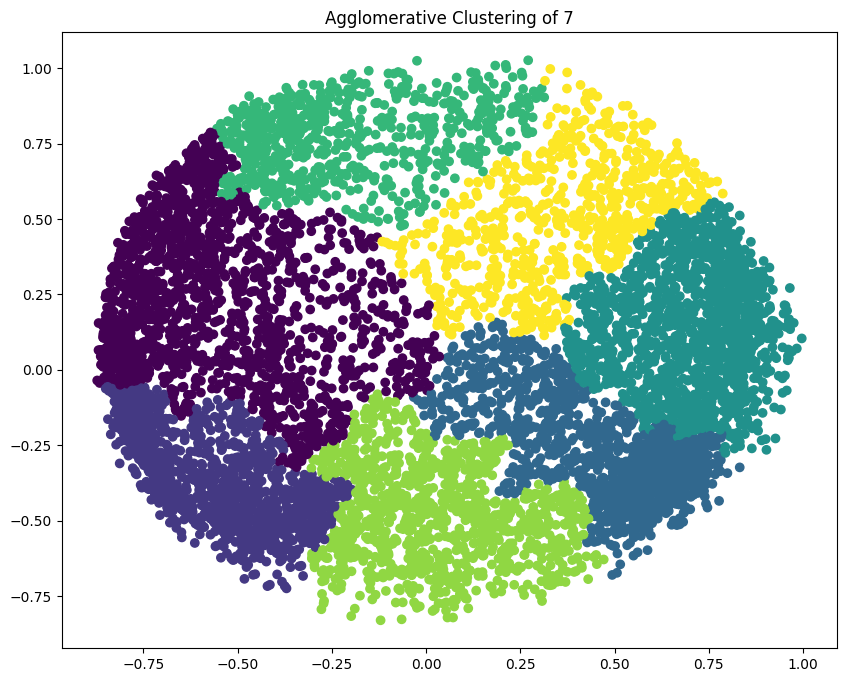

Solhouette score for 7 : 0.3206706661813839


In [60]:
k=[2,3,4,5,6,7]
sscore=[]

for i in k:
  ac=AgglomerativeClustering(n_clusters=i)
  cluster_labels=ac.fit_predict(df_pca)
  plt.figure(figsize=(10,8))
  plt.scatter(df_pca['P1'],df_pca['P2'], c=cluster_labels, cmap='viridis')
  plt.title(f"Agglomerative Clustering of {i}")
  plt.show()

  sil_avg=silhouette_score(df_pca,cluster_labels)
  sscore.append(sil_avg)
  print(f"Solhouette score for {i} : {sil_avg}")

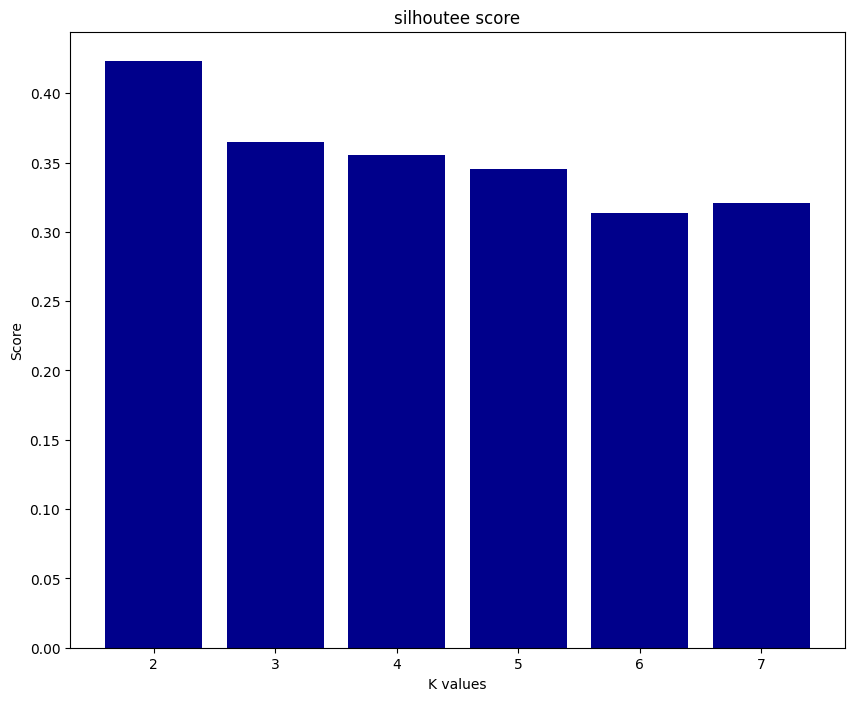

In [64]:
plt.figure(figsize=(10,8))
plt.bar(k,sscore, color='Darkblue')
plt.xlabel("K values")
plt.ylabel("Score")
plt.title("silhoutee score")
plt.show()

In [66]:
for i,j in enumerate(k):
  print(f" {i} : {sscore[i]:.4f}")

 0 : 0.4232
 1 : 0.3648
 2 : 0.3558
 3 : 0.3450
 4 : 0.3133
 5 : 0.3207


In [59]:
#---------------------------------------------------------------------------

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [67]:
df=pd.read_csv('/content/CC GENERAL.csv')

In [68]:
df.dropna(inplace=True)

In [72]:
df.drop('CUST_ID', axis=1,inplace=True)

In [73]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [74]:
df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [75]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df)

In [76]:
norm=normalize(scaled)

In [77]:
norm=pd.DataFrame(norm)

In [78]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(norm)
df_pca=pd.DataFrame(df_pca, columns=['P1','P2'])

In [85]:
print(f" Explained Variance Ratio : {pca.explained_variance_ratio_}")

 Explained Variance Ratio : [0.29255562 0.18306542]


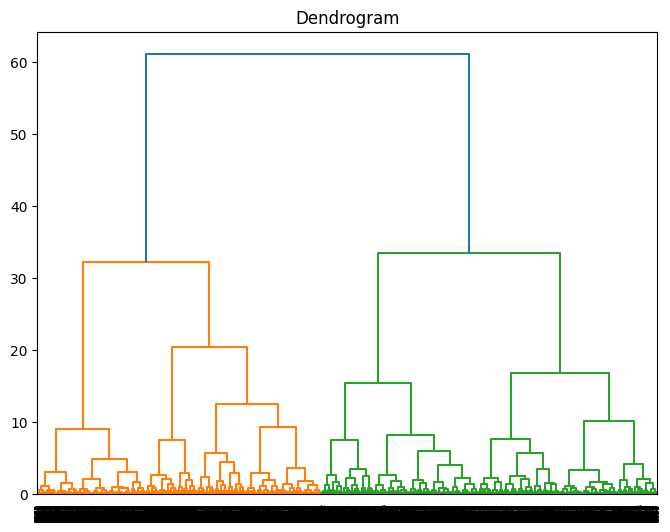

In [79]:
plt.figure(figsize=(8,6))
plt.title("Dendrogram")
dendrogram=shc.dendrogram(shc.linkage(df_pca.values , method='ward'))
plt.show()

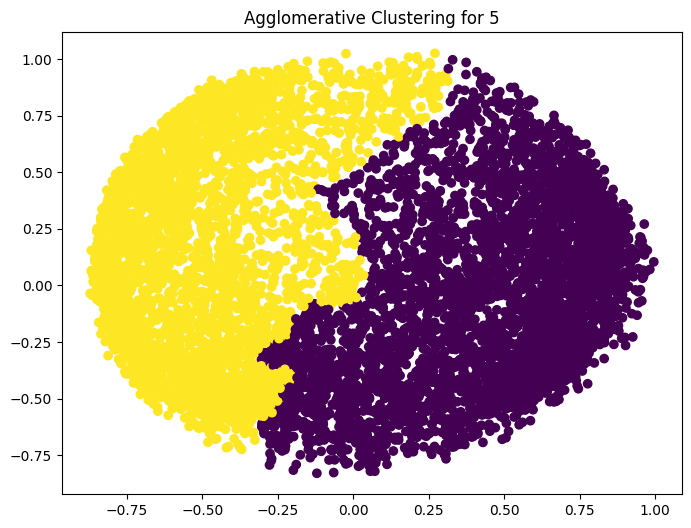

Silhouette Score : 0.42321401633142125


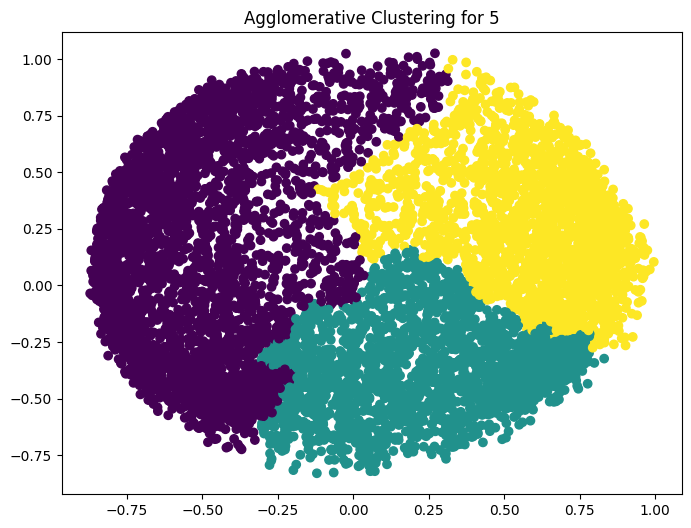

Silhouette Score : 0.36481931015401675


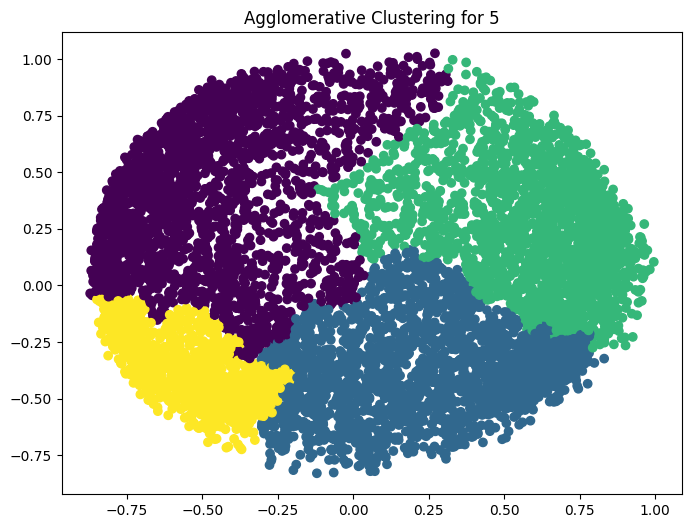

Silhouette Score : 0.3557688175069914


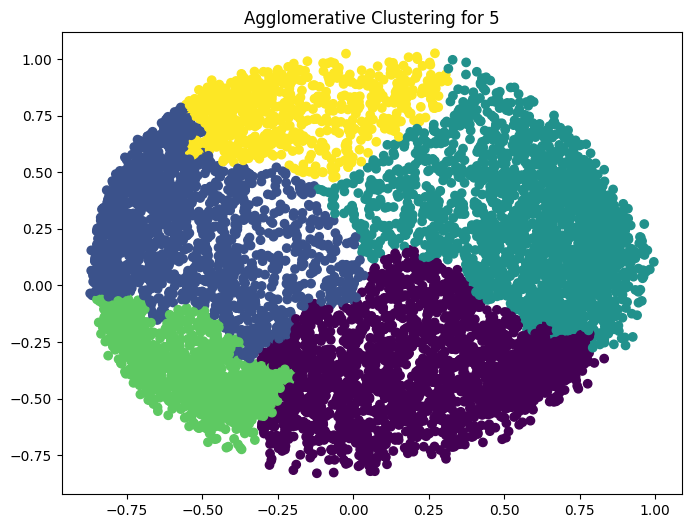

Silhouette Score : 0.3450421622328166


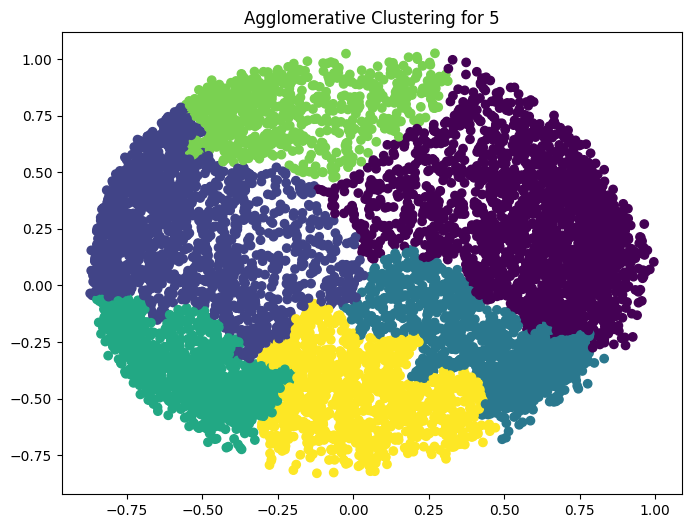

Silhouette Score : 0.31328368900006576


In [82]:
kval=[2,3,4,5,6]
score=[]

for k in kval:
  ac=AgglomerativeClustering(n_clusters=k)
  cluster_label=ac.fit_predict(df_pca)

  plt.figure(figsize=(8,6))
  plt.scatter(df_pca['P1'], df_pca['P2'], c=cluster_label, cmap='viridis')
  plt.title(f"Agglomerative Clustering for {i}")
  plt.show()

  savg=silhouette_score(df_pca,cluster_label)
  score.append(savg)

  print(f"Silhouette Score : {savg}")


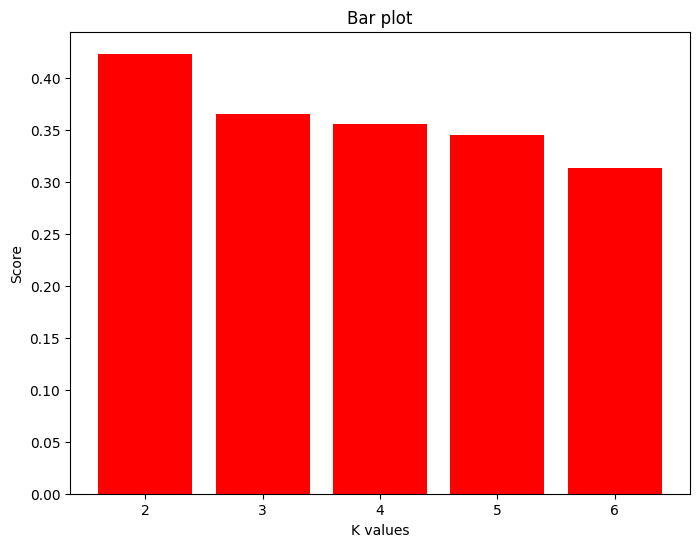

In [83]:
plt.figure(figsize=(8,6))
plt.bar(kval,score,color='Red')
plt.xlabel('K values')
plt.ylabel('Score')
plt.title("Bar plot")
plt.show()

In [84]:
for i,j in enumerate(kval):
  print(f" Silhouette Score for {i} : {score[i]:.4f}")

 Silhouette Score for 0 : 0.4232
 Silhouette Score for 1 : 0.3648
 Silhouette Score for 2 : 0.3558
 Silhouette Score for 3 : 0.3450
 Silhouette Score for 4 : 0.3133


In [86]:
#---------------------------------------------------------------

In [87]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [90]:
def get_links(url):
  try:
    response=requests.get(url)
    soup=BeautifulSoup(response.content,'html.parser')
    return {a['href'] for a in soup.find_all('a',href=True)}
  except Exception:
    return set()

In [94]:
websites=['https://www.reddit.com/','https://towardsdatascience.com/','https://www.myntra.com/']
damp=0.85
iter=100
pagerank={url : 1/len(websites) for url in websites}
linkmap={url : get_links(url) for url in websites}

In [95]:
pagerank

{'https://www.reddit.com/': 0.3333333333333333,
 'https://towardsdatascience.com/': 0.3333333333333333,
 'https://www.myntra.com/': 0.3333333333333333}

In [100]:
for _ in range(iter):
  newpagerank={}
  for url in websites:
    rank=(1-damp)/len(websites)
    for linkurl in linkmap:
      if url in linkmap[linkurl]:
        rank+=damp*(pagerank[linkurl]/len(linkmap[linkurl]))
    newpagerank[url]=rank
  pagerank=newpagerank

In [102]:
sorted_pg = sorted(pagerank.items(),key=lambda x:x[1], reverse=True)
for i in sorted_pg:
  print(i)

('https://www.reddit.com/', 0.05000000000000001)
('https://towardsdatascience.com/', 0.05000000000000001)
('https://www.myntra.com/', 0.05000000000000001)


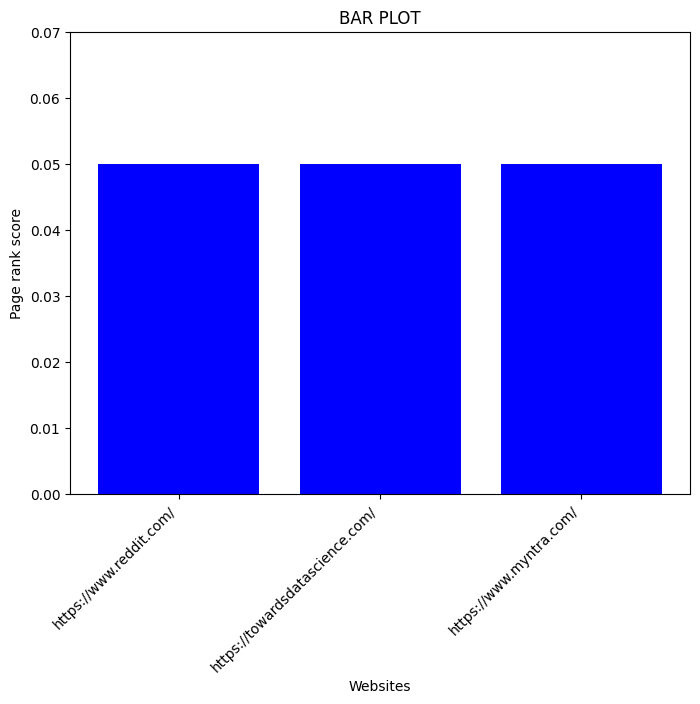

In [106]:
def plotgraph(pagerank):
  urls,ranks=zip(*sorted(pagerank.items(), key=lambda x:x[1], reverse=True))
  plt.figure(figsize=(8,6))
  plt.bar(urls,ranks,color='blue')
  plt.xlabel("Websites")
  plt.ylabel("Page rank score")
  plt.title("BAR PLOT")
  plt.xticks(rotation=45, ha="right")
  plt.ylim(0, max(ranks)+0.02)
  plt.show()

plotgraph(pagerank)

In [ ]:
#-------------------------------------------------------

In [107]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [108]:
def get_links(url):
  try:
    response=requests.get(url)
    soup=BeautifulSoup(response.content,'html.parser')
    return {a['herf'] for a in soup.find_all('a',href=True)}
  except Exception:
    return set()

In [109]:
websites=['https://towardsdatascience.com/','https://realpython.com/','https://techcrunch.com/','https://www.reddit.com/']

In [110]:
damp=0.85
iter=100
pagerank = {url : 1/len(websites) for url in websites}
linkmap = {url : get_links(url) for url in websites}

In [111]:
for _ in range(iter):
  newpgrank={}
  for url in websites:
    rank=(1-damp)/len(websites)
    for linkurl in linkmap:
      if url in linkmap[linkurl]:
        rank+=damp*(pagerank[linkurl]/len(linkmap[linkurl]))
    newpgrank[url]=rank
  pagerank=newpgrank

print("Sorted ranks :")
sorted_pg=sorted(pagerank.items(), key=lambda x:x[1], reverse=True)
for i in sorted_pg:
  print(i)

Sorted ranks :
('https://towardsdatascience.com/', 0.037500000000000006)
('https://realpython.com/', 0.037500000000000006)
('https://techcrunch.com/', 0.037500000000000006)
('https://www.reddit.com/', 0.037500000000000006)


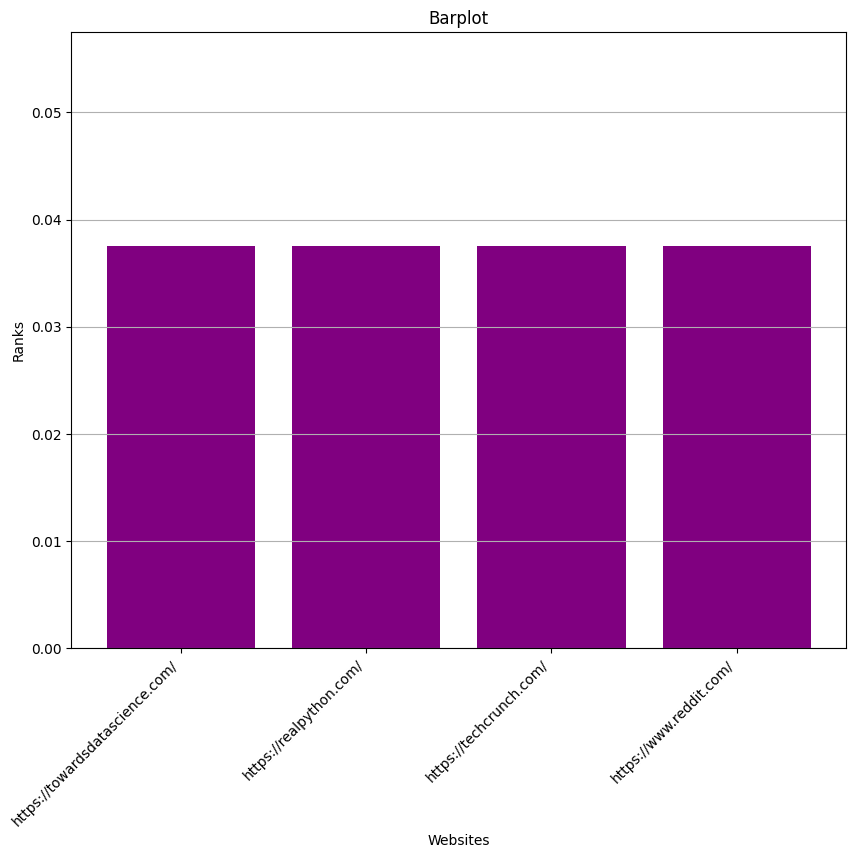

In [112]:
def plotgraph(pagerank):
  urls,ranks=zip(*sorted(pagerank.items(),key=lambda x:x[1], reverse=True))
  plt.figure(figsize=(10,8))
  plt.bar(urls,ranks,color="Purple")
  plt.xlabel("Websites")
  plt.ylabel("Ranks")
  plt.title("Barplot")
  plt.xticks(rotation=45, ha="right")
  plt.ylim(0, max(ranks)+0.02)
  plt.grid(axis='y')
  plt.show()

plotgraph(pagerank)